<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/notebooks/overSampling_creditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# Imported Libraries
```

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [2]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [3]:
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('label_TestData.csv')
df.head()

,Unnamed: 0,CustomID,A,B,C,D,A1,A2,A3,A4,B1,B2,B3,B4,C1,D1,D2,group
0,0,C00001,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5
1,1,C00002,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2,C00003,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5
3,3,C00004,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5
4,4,C00005,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,5


In [5]:
df.describe()

,Unnamed: 0,A,B,C,D,A1,A2,A3,A4,B1,B2,B3,B4,C1,D1,D2,group
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.0,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,97.000000,0.969231,0.974359,0.974359,0.974359,0.0,0.010256,0.020513,0.005128,0.020513,0.010256,0.020513,0.010256,0.025641,0.025641,0.020513,5.041026
std,56.435804,0.173136,0.158469,0.158469,0.158469,0.0,0.101013,0.142111,0.071611,0.142111,0.101013,0.142111,0.101013,0.158469,0.158469,0.142111,0.535694
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,48.500000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,97.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,145.500000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
max,194.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [6]:
# Good No Null Values!
df.isnull().sum().max()

0

In [7]:
df.columns

Index(['Unnamed: 0', 'CustomID', 'A', 'B', 'C', 'D', 'A1', 'A2', 'A3', 'A4',
       'B1', 'B2', 'B3', 'B4', 'C1', 'D1', 'D2', 'group'],
      dtype='object')

In [8]:
count=df['group'].value_counts()
count

5    190
9      3
3      2
Name: group, dtype: int64

In [9]:
# The classes are heavily skewed we need to solve this issue later.
print('group 1', round(df['group'].value_counts()[5]/len(df) * 100,2), '% of the dataset')
print('group 2', round(df['group'].value_counts()[9]/len(df) * 100,2), '% of the dataset')
print('group 3', round(df['group'].value_counts()[3]/len(df) * 100,2), '% of the dataset')

group 1 97.44 % of the dataset
group 2 1.54 % of the dataset
group 3 1.03 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (5: Normal || 9: Fraud1 || 3: Fraud2)')

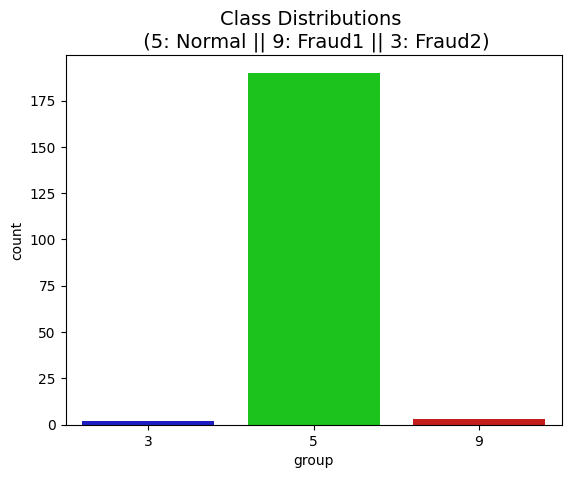

In [10]:
colors = ["#0101DF", "#01DF01", "#DF0101"]

sns.countplot(x='group', data=df, palette=colors)
plt.title('Class Distributions \n (5: Normal || 9: Fraud1 || 3: Fraud2)', fontsize=14)

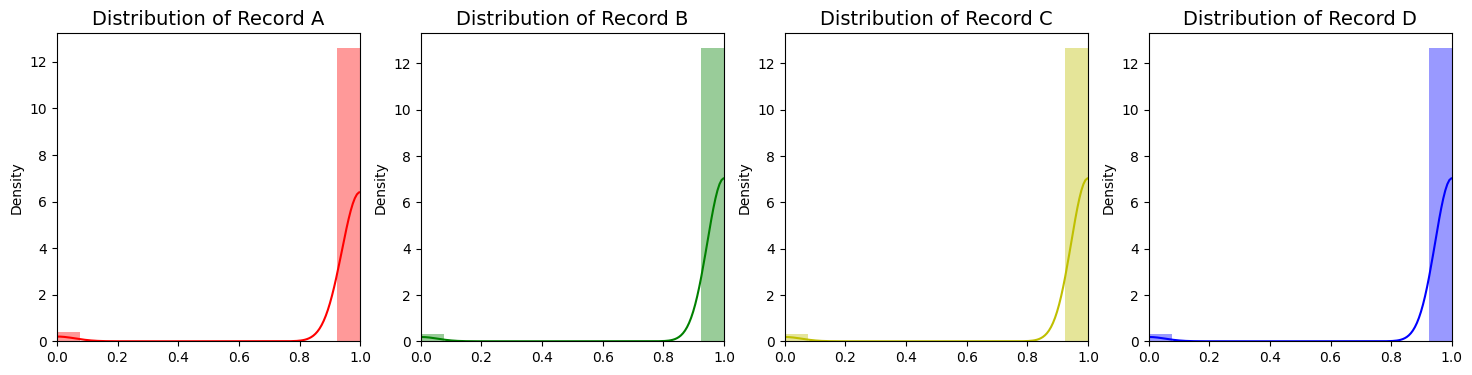

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(18,4))

a_val = df['A'].values
b_val = df['B'].values
c_val = df['C'].values
d_val = df['D'].values

sns.distplot(a_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Record A', fontsize=14)
ax[0].set_xlim([min(a_val), max(a_val)])

sns.distplot(b_val, ax=ax[1], color='g')
ax[1].set_title('Distribution of Record B', fontsize=14)
ax[1].set_xlim([min(b_val), max(b_val)])

sns.distplot(c_val, ax=ax[2], color='y')
ax[2].set_title('Distribution of Record C', fontsize=14)
ax[2].set_xlim([min(c_val), max(c_val)])

sns.distplot(d_val, ax=ax[3], color='b')
ax[3].set_title('Distribution of Record D', fontsize=14)
ax[3].set_xlim([min(d_val), max(d_val)])

plt.show()

In [12]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_A'] = rob_scaler.fit_transform(df['A'].values.reshape(-1,1))
df['scaled_B'] = rob_scaler.fit_transform(df['B'].values.reshape(-1,1))
df['scaled_C'] = rob_scaler.fit_transform(df['C'].values.reshape(-1,1))
df['scaled_D'] = rob_scaler.fit_transform(df['D'].values.reshape(-1,1))

#df.drop(['Time','Amount'], axis=1, inplace=True)

In [13]:
scaled_a = df['scaled_A']
scaled_b = df['scaled_B']
scaled_c = df['scaled_C']
scaled_d = df['scaled_D']


#df.drop(['scaled_a', 'scaled_b', 'scaled_c', 'scaled_d'], axis=1, inplace=True)
df.drop(['A', 'B', 'C', 'D'], axis=1, inplace=True)
df.insert(0, 'scaled_a', scaled_a)
df.insert(1, 'scaled_b', scaled_b)
df.insert(2, 'scaled_c', scaled_c)
df.insert(3, 'scaled_d', scaled_d)

# Amount and Time are Scaled!

df.head()

,scaled_a,scaled_b,scaled_c,scaled_d,Unnamed: 0,CustomID,A1,A2,A3,A4,...,B3,B4,C1,D1,D2,group,scaled_A,scaled_B,scaled_C,scaled_D
0,0.0,0.0,0.0,0.0,0,C00001,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1,C00002,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,2,C00003,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,3,C00004,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,4,C00005,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
#print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
# The classes are heavily skewed we need to solve this issue later.
print('group 1', round(df['group'].value_counts()[5]/len(df) * 100,2), '% of the dataset')
print('group 2', round(df['group'].value_counts()[9]/len(df) * 100,2), '% of the dataset')
print('group 3', round(df['group'].value_counts()[3]/len(df) * 100,2), '% of the dataset')
X = df.drop('group', axis=1)
y = df['group']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

group 1 97.44 % of the dataset
group 2 1.54 % of the dataset
group 3 1.03 % of the dataset
Train: [ 38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194] Test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 39]
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  

In [15]:
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.00641026 0.97435897 0.01923077]
[0.02564103 0.97435897]


In [16]:
len(df)

195

In [17]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
Normal_df = df.loc[df['group'] == 5]
non_Normal_df = df.loc[df['group'] != 5][:195]

normal_distributed_df = pd.concat([Normal_df, non_Normal_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_a,scaled_b,scaled_c,scaled_d,Unnamed: 0,CustomID,A1,A2,A3,A4,...,B3,B4,C1,D1,D2,group,scaled_A,scaled_B,scaled_C,scaled_D
191,0.0,0.0,0.0,0.0,191,C00192,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0
188,0.0,0.0,0.0,0.0,188,C00189,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0
91,0.0,0.0,0.0,0.0,91,C00092,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0
185,0.0,0.0,0.0,0.0,185,C00186,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,90,C00091,0,0,0,0,...,0,0,0,0,0,5,0.0,0.0,0.0,0.0


Distribution of the Classes in the subsample dataset
5    0.974359
9    0.015385
3    0.010256
Name: group, dtype: float64


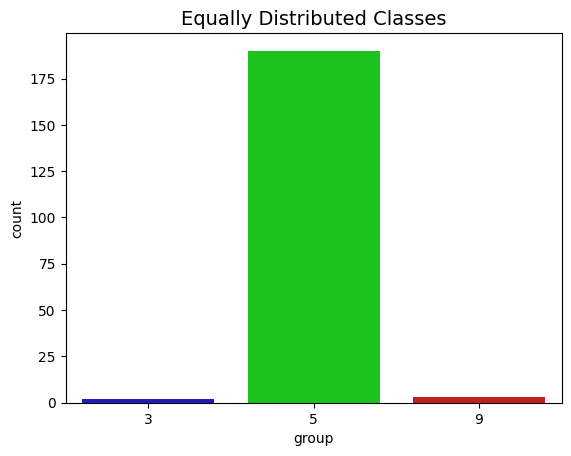

In [20]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['group'].value_counts()/len(new_df))

sns.countplot(x='group', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()